Email spam Detection with Machine Learning

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
import pandas as pd

df_spam = pd.read_csv("C:\\Users\\arjav\\Downloads\\archive (2)\\spam.csv", encoding='latin1')
df_spam.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# Load with correct encoding
df = pd.read_csv("C:\\Users\\arjav\\Downloads\\archive (2)\\spam.csv", encoding='latin1')

# View first few rows
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# Keep only relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Remove duplicates and check nulls
df.drop_duplicates(inplace=True)
df.isnull().sum()


label      0
message    0
dtype: int64

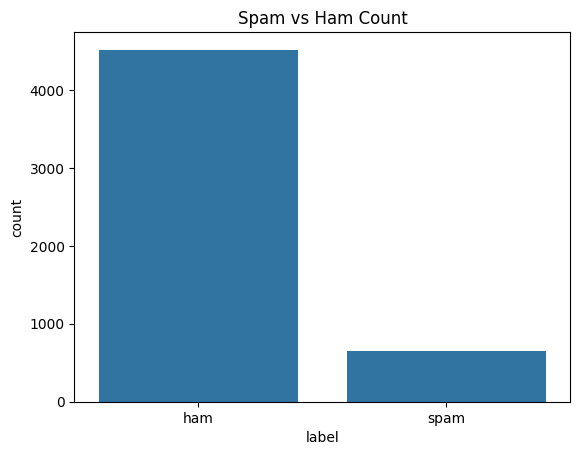

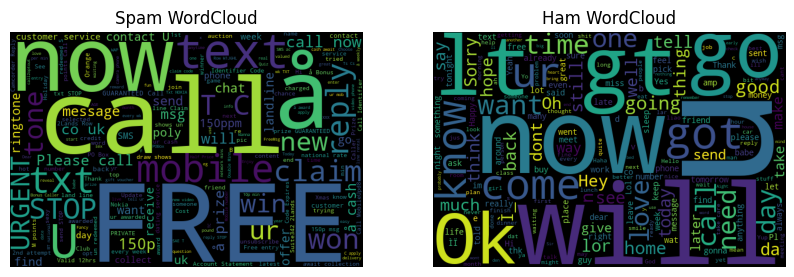

In [15]:
# Label count
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Count")
plt.show()

# WordClouds
spam_words = ' '.join(df[df['label'] == 'spam']['message'])
ham_words = ' '.join(df[df['label'] == 'ham']['message'])

spam_wc = WordCloud(width=600, height=400).generate(spam_words)
ham_wc = WordCloud(width=600, height=400).generate(ham_words)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(spam_wc)
plt.axis('off')
plt.title("Spam WordCloud")

plt.subplot(1,2,2)
plt.imshow(ham_wc)
plt.axis('off')
plt.title("Ham WordCloud")
plt.show()


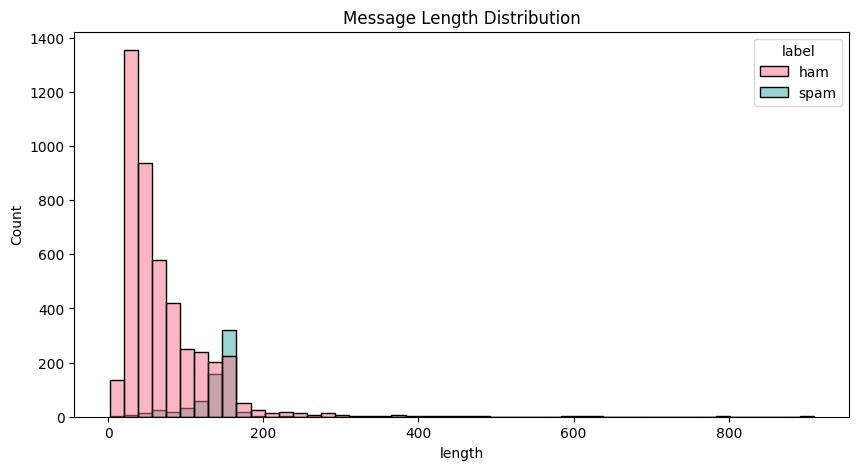

In [18]:
df['length'] = df['message'].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='length', hue='label', bins=50, palette='husl')
plt.title('Message Length Distribution')
plt.show()


In [22]:
import re
import string

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text


In [23]:
df['cleaned'] = df['message'].apply(clean_text)


C:\Users\arjav\AppData\Local\Temp\ipykernel_14204\1830240635.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_df, x='word', y='count', palette='Reds_r')


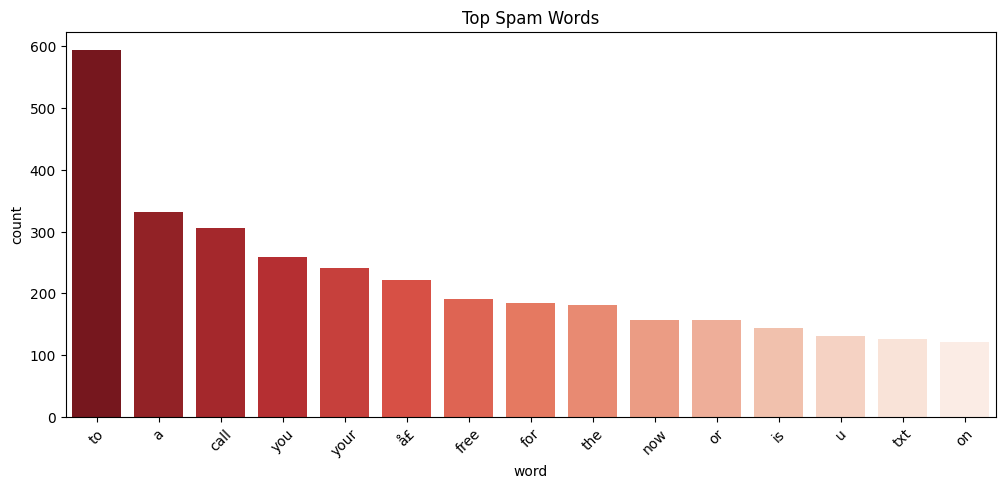

C:\Users\arjav\AppData\Local\Temp\ipykernel_14204\1830240635.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_df, x='word', y='count', palette='Greens_r')


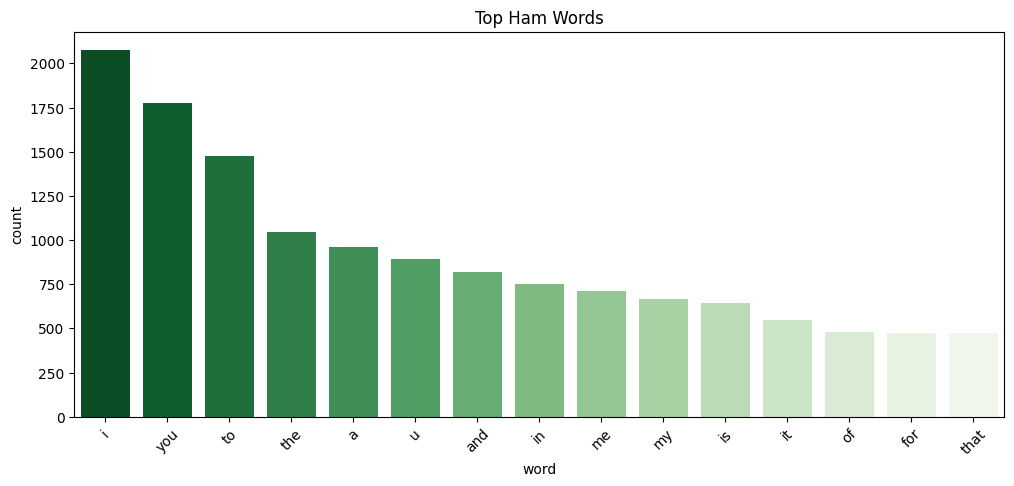

In [24]:
from collections import Counter

# Combine all spam and ham cleaned messages
spam_words = ' '.join(df[df['label']=='spam']['cleaned']).split()
ham_words = ' '.join(df[df['label']=='ham']['cleaned']).split()

# Count most common
spam_freq = Counter(spam_words).most_common(15)
ham_freq = Counter(ham_words).most_common(15)

# Convert to DataFrame
spam_df = pd.DataFrame(spam_freq, columns=['word', 'count'])
ham_df = pd.DataFrame(ham_freq, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,5))
sns.barplot(data=spam_df, x='word', y='count', palette='Reds_r')
plt.title("Top Spam Words")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(data=ham_df, x='word', y='count', palette='Greens_r')
plt.title("Top Ham Words")
plt.xticks(rotation=45)
plt.show()


In [26]:
import re
import string

# Define a basic text cleaning function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = text.strip()
    return text

# Apply to the message column
df['cleaned'] = df['message'].astype(str).apply(preprocess_text)

# Show a few cleaned messages
df[['message', 'cleaned']].head()


,message,cleaned
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Fit and transform the cleaned text
X = tfidf.fit_transform(df['cleaned']).toarray()

# Label Encoding: Convert 'ham' to 0 and 'spam' to 1
y = df['label'].map({'ham': 0, 'spam': 1}).values

# Print shape to confirm
print("TF-IDF Matrix Shape:", X.shape)
print("Labels Shape:", y.shape)


TF-IDF Matrix Shape: (5169, 3000)
Labels Shape: (5169,)


In [29]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Confirm the split
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)


Training Data Shape: (4135, 3000)
Test Data Shape: (1034, 3000)


In [30]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
model = MultinomialNB()

# Train the model on training data
model.fit(X_train, y_train)

print("✅ Model training completed!")


✅ Model training completed!


✅ Accuracy: 0.9681

📊 Confusion Matrix:
 [[889   0]
 [ 33 112]]


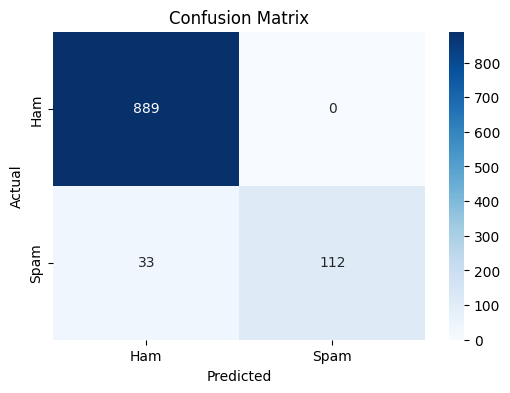


📈 Classification Report:
               precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       889
        Spam       1.00      0.77      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))
